In [1]:
import random
import time
import string

import numpy as np
from collections import Counter
from memory_profiler import memory_usage

# Optimization of Algorithms problems

## Exercise 1
### Code Optimization for Text Processing

You are provided with a text processing code to perform the following operations:

1. Convert all text to lowercase.
2. Remove punctuation marks.
3. Count the frequency of each word.
4. Show the 5 most common words.

The code works, but it is inefficient and can be optimized. Your task is to identify areas that can be improved and rewrite those parts to make the code more efficient and readable.

In [2]:
def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

def count_words(text):
    # Split text into words
    palabras = text.split()

    return Counter(palabras)

def get_most_common(frequencies, n = 5):
    return frequencies.most_common(n)

def process_text(text):
    # Text to lowercase
    text = text.lower()

    # Remove punctuation
    text = remove_punctuation(text)
    
    # Count frecuencies
    frequencies = count_words(text)
    
    top_5 = get_most_common(frequencies)
    
    for w, frequency in top_5:
        print(f"'{w}': {frequency} veces")

text = """
    In the heart of the city, Emily discovered a quaint little café, hidden away from the bustling streets. 
    The aroma of freshly baked pastries wafted through the air, drawing in passersby. As she sipped on her latte, 
    she noticed an old bookshelf filled with classics, creating a cozy atmosphere that made her lose track of time.
"""

process_text(text)

'the': 5 veces
'of': 3 veces
'in': 2 veces
'a': 2 veces
'she': 2 veces


Points to optimize:

1. **Removal of punctuation marks**: Using `replace` in a loop can be inefficient, especially with long texts. Look for a more efficient way to remove punctuation marks.
2. **Frequency count**: The code checks for the existence of each word in the dictionary and then updates its count. This can be done more efficiently with certain data structures in Python.
3. **Sort and select:** Consider if there is a more direct or efficient way to get the 5 most frequent words without sorting all the words.
4. **Modularity**: Break the code into smaller functions so that each one performs a specific task. This will not only optimize performance, but also make the code more readable and maintainable.

In [3]:
from collections import Counter

def lowercase(text: str) -> str:
    '''Takes text string, returns lowercased string.'''

    return text.lower()

def remove_punctuation(text: str) -> str:
    '''Takes text string, removes common puncuation marks. returns string'''

    return ''.join([x for x in list(text) if x not in string.punctuation])

def top_n(text: str, n: int) -> list:
    '''Takes text string and n, returns a list of tuples containing the top n most common 
    words: (word, frequency).'''

    return Counter(text.split()).most_common(n)

print(top_n(text, 5))

[('the', 4), ('of', 3), ('a', 2), ('she', 2), ('her', 2)]


## Exercise 2
### Code Optimization for List Processing

You have been given a code that performs operations on a list of numbers for:

1. Filter out even numbers.
2. Duplicate each number.
3. Add all numbers.
4. Check if the result is a prime number.

The code provided achieves its goal, but it may be inefficient. Your task is to identify and improve the parts of the code to increase its efficiency.

In [6]:
import math

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def process_list(list_):
    filtered_list = []
    for num in list_:
        if num % 2 == 0:
            filtered_list.append(num)
    
    duplicate_list = []
    for num in filtered_list:
        duplicate_list.append(num * 2)
        
    sum = 0
    for num in duplicate_list:
        sum += num

    prime = is_prime(sum)
    
    return sum, prime

nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result, result_prime = process_list(nums)
print(f"Result: {result}, ¿Prime? {'Yes' if result_prime else 'No'}")

Result: 60, ¿Prime? No


Points to optimize:

1. **Filter numbers**: The code goes through the original list to filter out even numbers. Consider a more efficient way to filter the list.
2. **Duplication**: The list is traversed multiple times. Is there a way to do this more efficiently?
3. **Summing**: The numbers in a list are summed through a loop. Python has built-in functions that can optimize this.
4. **Function `is_prime`**: While this function is relatively efficient, investigate if there are ways to make it even faster.
5. **Modularity**: Consider breaking the code into smaller functions, each focused on a specific task.

### 1. Removing even numbers

In [7]:
# Two possible functions to remove even numbers, one that uses
# Numpy and one the uses a list comprehension.

def numpy_remove_evens(nums: list) -> list:
    '''Removes even numbers from list using np.where.'''

    nums=np.array(nums)

    return nums[nums % 2 != 0]


def list_comp_remove_evens(nums: list) -> list:
    '''Removes even numbers from list using list comprehension.'''

    return [x for x in nums if x % 2 !=0]


nums=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(f'Numpy result: {numpy_remove_evens(nums)}')
print(f'List comprehension result: {list_comp_remove_evens(nums)}')

Numpy result: [1 3 5 7 9]
List comprehension result: [1, 3, 5, 7, 9]


Test the two different versions for speed and memory usage.

In [29]:
n=500       # Number of trial to run
k=10000000  # List length to use for each trial

In [30]:
# Run the memory usage test with n replicates of k numbers each
numpy_memory_use=[]
list_comprehension_memory_use=[]

# Collet n memory use measurments with different random lists
for trial in range(n):

    # Generate some random integers for this trial
    random_list=random.choices(list(range(0,100)), k=k)

    # Test numpy version
    mem_usage=memory_usage((numpy_remove_evens, (random_list,)))
    numpy_memory_use.append(max(mem_usage))

    # Test list comprehension version
    mem_usage=memory_usage((list_comp_remove_evens, (random_list,)))
    list_comprehension_memory_use.append(max(mem_usage))

In [31]:
# Run execution time test with n replicates of k numbers each
numpy_execution_time=[]
list_comprehension_execution_time=[]

# Collet n speed measurments with different random lists
for trial in range(n):

    # Generate some random integers for this trial
    random_list=random.choices(list(range(0,100)), k=k)

    # Test numpy version
    start=time.time()
    numpy_remove_evens(random_list)
    numpy_execution_time.append(time.time() - start)

    # Test list comprehension version
    start=time.time()
    list_comp_remove_evens(random_list)
    list_comprehension_execution_time.append(time.time() - start)

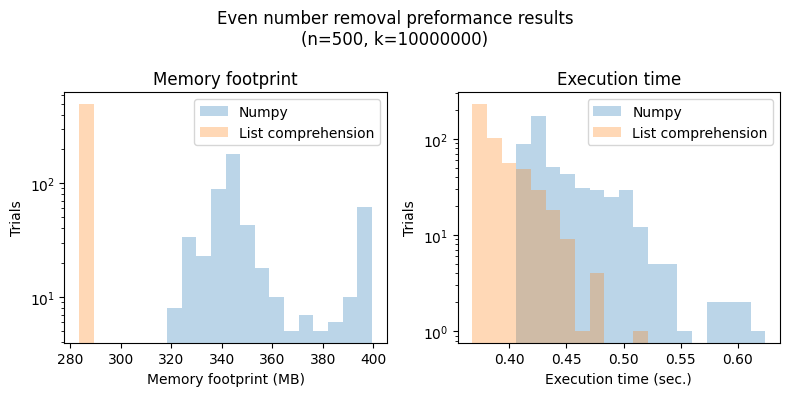

In [32]:
# Plot the results
import matplotlib.pyplot as plt

fig, axs=plt.subplots(1, 2, figsize=(8, 4))
axs=axs.flatten()

fig.suptitle(f'Even number removal preformance results\n(n={n}, k={k})')

_, memory_bins=np.histogram(numpy_memory_use + list_comprehension_memory_use, bins=20)

axs[0].set_title('Memory footprint')
axs[0].hist(numpy_memory_use, bins=memory_bins, alpha=0.3, label='Numpy')
axs[0].hist(list_comprehension_memory_use, bins=memory_bins, alpha=0.3, label='List comprehension')
axs[0].set_xlabel('Memory footprint (MB)')
axs[0].set_ylabel('Trials')
axs[0].set_yscale('log')
axs[0].legend(loc='best')

_, time_bins=np.histogram(numpy_execution_time + list_comprehension_execution_time, bins=20)

axs[1].set_title('Execution time')
axs[1].hist(numpy_execution_time, bins=time_bins, alpha=0.3, label='Numpy')
axs[1].hist(list_comprehension_execution_time, bins=time_bins, alpha=0.3, label='List comprehension')
axs[1].set_xlabel('Execution time (sec.)')
axs[1].set_ylabel('Trials')
axs[1].set_yscale('log')
axs[1].legend(loc='best')

plt.tight_layout()
plt.show()

Both exercises will help you improve your code performance optimization skills and give you a better understanding of how different data structures and programming techniques can affect the efficiency of your code.